## 1. Importing libraries

In [ ]:
import os
import glob
import numpy as np
import pandas as pd
from PIL import Image
import imageio.v2 as imageio
import cv2
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from PIL import Image
from sklearn.metrics import mean_squared_error, r2_score
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, BatchNormalization, Dropout
from tensorflow.keras.optimizers import Adam, SGD

# os.chdir(r'path\to\your\working\directory')  # TODO: set your own CWD or remove entirely


## 2. Image preprocessing

In [ ]:
img_path = 'path/to/your/data' #TODO: set your own path
X_train = []
y_train = [] 
X_test = []    
y_test = []

img_rows = 64
img_cols = 64
bands = 13
label = 0

# Training and testing splitting
test_size = 0.3
random_state = 1

for folder in os.listdir(img_path):
    print(folder)
    folder = img_path + '/' + folder
   
    X_class = []
    y_class = []
    
    for img in glob.glob(folder + '/*.tif'):  
        img = imageio.imread(img)
        img = np.asarray(img)
        #img = np.resize(img,(img_rows,img_cols,bands))
                
        X_class.append(img)
        y_class.append(label)
        
    X_class = np.asarray(X_class)
    y_class = np.asarray(y_class)
    
    X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(X_class, y_class, test_size=0.3, random_state=1)
    
    X_train.append(X_train_class)
    X_test.append(X_test_class)
    y_train.append(y_train_class)
    y_test.append(y_test_class)        
    label = label+1

## Convert list to numpy arraries
X_train = np.vstack(X_train)
y_train = np.concatenate(y_train)
X_test = np.vstack(X_test)   
y_test = np.concatenate(y_test)

## change the shape of y from (n_samples,1)  to (n_samples,)
y_train = np.ravel(y_train)
y_test = np.ravel(y_test)


Forest
Industrial
PermanentCrop
Residential
River


In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)






(700, 64, 64, 13)
(300, 64, 64, 13)
(700,)
(300,)


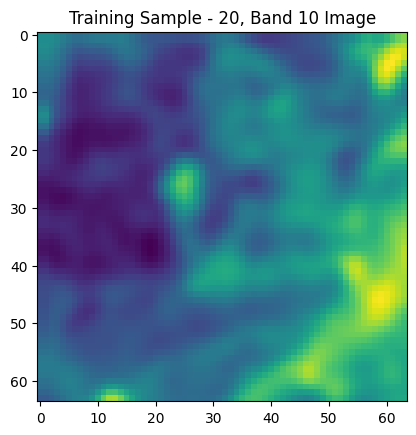

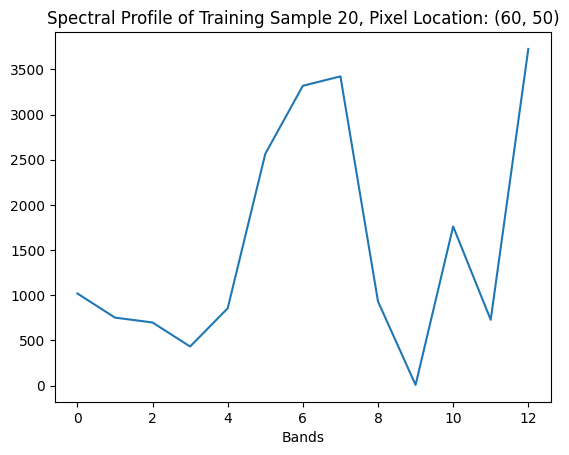

In [ ]:
plt.imshow(X_train[20][:,:,10])
plt.title('Training Sample - 20, Band 10 Image')
plt.show()


plt.plot(X_train[20][60,50,:])
plt.title('Spectral Profile of Training Sample 20, Pixel Location: (60, 50)')
plt.xlabel('Bands')
plt.show()


## 3. Appying a custom-designed CNN model for image classification

### 3.1 Custom design a CNN architecture

In [5]:

input_shape = X_train[0].shape

#Create model

model = Sequential()

# add model layers
model.add(Conv2D(32, (3,3), padding = "SAME", strides = (1,1), activation = 'relu', input_shape = input_shape))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Conv2D(32, (3,3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Conv2D(64, (3,3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Dropout(0.5))
model.add(Flatten())

model.add(Dense(64, activation = 'relu'))
model.add(Dense(128, activation = 'relu'))
model.add(Dense(256, activation = 'relu'))

# output layer
model.add(Dense(5, activation = 'softmax'))


model.summary()

C:\Users\santa\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 64, 64, 32)          │           3,776 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 32, 32, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 30, 30, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2304)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │         147,520 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 256)                 │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 5)                   │           1,285 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 221,669 (865.89 KB)

 Trainable params: 221,669 (865.89 KB)

 Non-trainable params: 0 (0.00 B)

### 3.2 Custom designed CNN model training and testing

#### 3.2.1 CNN model compile and training

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint

#Model parameter pre-define

batch_size = 24
learn_rate = 0.001
opt = Adam(learning_rate = learn_rate)
epochs = 300

# Checkpoint Strategy
filepath = "optimal_weights_cnn.keras"

checkpoint = ModelCheckpoint(filepath, monitor = 'val_loss', verbose = 1, save_best_only = True, mode = 'auto')
callbacks_list = [checkpoint]

# Model Compile
model.compile(optimizer = opt, loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs = epochs, batch_size = batch_size, validation_split = 0.25, callbacks = callbacks_list, verbose = 1)



Epoch 1/300
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.3133 - loss: 134.8188
Epoch 1: val_loss improved from inf to 24.20935, saving model to optimal_weights_cnn.keras
22/22 ━━━━━━━━━━━━━━━━━━━━ 4s 70ms/step - accuracy: 0.3164 - loss: 131.6362 - val_accuracy: 0.0857 - val_loss: 24.2094
Epoch 2/300
21/22 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.4889 - loss: 4.3219
Epoch 2: val_loss did not improve from 24.20935
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - accuracy: 0.4916 - loss: 4.1964 - val_accuracy: 0.0000e+00 - val_loss: 34.3433
Epoch 3/300
20/22 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.5503 - loss: 1.2621
Epoch 3: val_loss improved from 24.20935 to 16.00456, saving model to optimal_weights_cnn.keras
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.5488 - loss: 1.2702 - val_accuracy: 0.0114 - val_loss: 16.0046
Epoch 4/300
21/22 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.5497 - loss: 1.1799
Epoch 4: val_loss did not improve from 16.00456
22/22 ━━━━━━━━

Epoch 51/500
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 0.9523 - loss: 0.1337
Epoch 51: val_loss did not improve from 8.36442
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 64ms/step - accuracy: 0.9522 - loss: 0.1343 - val_accuracy: 0.1771 - val_loss: 14.8068
Epoch 52/500
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.9682 - loss: 0.0810
Epoch 52: val_loss did not improve from 8.36442
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 67ms/step - accuracy: 0.9678 - loss: 0.0824 - val_accuracy: 0.1829 - val_loss: 11.8617
Epoch 53/500
21/22 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 0.9551 - loss: 0.1656
Epoch 53: val_loss did not improve from 8.36442
22/22 ━━━━━━━━━━━━━━━━━━━━ 3s 71ms/step - accuracy: 0.9535 - loss: 0.1719 - val_accuracy: 0.1714 - val_loss: 13.1563
Epoch 54/500
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - accuracy: 0.9341 - loss: 0.1863
Epoch 54: val_loss did not improve from 8.36442
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 68ms/step - accuracy: 0.9344 - loss: 0.1850 - val_accuracy: 0.1771 - val_loss: 

Epoch 77/500
21/22 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 0.9911 - loss: 0.0289
Epoch 77: val_loss did not improve from 8.36442
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 73ms/step - accuracy: 0.9912 - loss: 0.0287 - val_accuracy: 0.1886 - val_loss: 16.3024
Epoch 78/500
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 0.9819 - loss: 0.0576
Epoch 78: val_loss did not improve from 8.36442
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 67ms/step - accuracy: 0.9821 - loss: 0.0571 - val_accuracy: 0.1714 - val_loss: 17.6675
Epoch 79/500
21/22 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.9899 - loss: 0.0636
Epoch 79: val_loss did not improve from 8.36442
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - accuracy: 0.9893 - loss: 0.0636 - val_accuracy: 0.1771 - val_loss: 17.5948
Epoch 80/500
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.9892 - loss: 0.0344
Epoch 80: val_loss did not improve from 8.36442
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 66ms/step - accuracy: 0.9891 - loss: 0.0347 - val_accuracy: 0.1714 - val_loss: 

Epoch 103/500
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - accuracy: 0.9863 - loss: 0.0444
Epoch 103: val_loss did not improve from 8.36442
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 70ms/step - accuracy: 0.9863 - loss: 0.0443 - val_accuracy: 0.1829 - val_loss: 12.9767
Epoch 104/500
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.9948 - loss: 0.0164
Epoch 104: val_loss did not improve from 8.36442
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step - accuracy: 0.9948 - loss: 0.0166 - val_accuracy: 0.1600 - val_loss: 14.0928
Epoch 105/500
21/22 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.9852 - loss: 0.0321
Epoch 105: val_loss did not improve from 8.36442
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 65ms/step - accuracy: 0.9845 - loss: 0.0368 - val_accuracy: 0.1829 - val_loss: 11.7030
Epoch 106/500
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.9872 - loss: 0.0536
Epoch 106: val_loss did not improve from 8.36442
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 64ms/step - accuracy: 0.9870 - loss: 0.0538 - val_accuracy: 0.1657 - va

22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - accuracy: 0.9561 - loss: 0.1483 - val_accuracy: 0.1943 - val_loss: 9.9626
Epoch 129/500
21/22 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.9259 - loss: 0.3036
Epoch 129: val_loss did not improve from 8.36442
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step - accuracy: 0.9272 - loss: 0.2968 - val_accuracy: 0.1600 - val_loss: 16.4573
Epoch 130/500
21/22 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 0.9812 - loss: 0.0754
Epoch 130: val_loss did not improve from 8.36442
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 68ms/step - accuracy: 0.9802 - loss: 0.0788 - val_accuracy: 0.1829 - val_loss: 15.0827
Epoch 131/500
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 0.9608 - loss: 0.1078
Epoch 131: val_loss did not improve from 8.36442
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 66ms/step - accuracy: 0.9611 - loss: 0.1068 - val_accuracy: 0.1543 - val_loss: 11.6800
Epoch 132/500
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 0.9894 - loss: 0.0330
Epoch 132: val_loss did not improv

Epoch 154/500
21/22 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 1.0000 - loss: 5.1799e-04
Epoch 154: val_loss did not improve from 8.36442
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 65ms/step - accuracy: 1.0000 - loss: 5.7345e-04 - val_accuracy: 0.1657 - val_loss: 15.8605
Epoch 155/500
21/22 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 1.0000 - loss: 0.0014
Epoch 155: val_loss did not improve from 8.36442
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 66ms/step - accuracy: 1.0000 - loss: 0.0014 - val_accuracy: 0.1600 - val_loss: 16.5443
Epoch 156/500
21/22 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.9908 - loss: 0.0212
Epoch 156: val_loss did not improve from 8.36442
22/22 ━━━━━━━━━━━━━━━━━━━━ 3s 60ms/step - accuracy: 0.9911 - loss: 0.0204 - val_accuracy: 0.1886 - val_loss: 13.9496
Epoch 157/500
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.9926 - loss: 0.0151
Epoch 157: val_loss did not improve from 8.36442
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step - accuracy: 0.9928 - loss: 0.0148 - val_accuracy: 0.1

22/22 ━━━━━━━━━━━━━━━━━━━━ 3s 58ms/step - accuracy: 0.9436 - loss: 0.1998 - val_accuracy: 0.1200 - val_loss: 12.0594
Epoch 180/500
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 0.9250 - loss: 0.2693
Epoch 180: val_loss did not improve from 8.36442
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 69ms/step - accuracy: 0.9235 - loss: 0.2758 - val_accuracy: 0.1314 - val_loss: 9.4348
Epoch 181/500
21/22 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 0.9347 - loss: 0.2153
Epoch 181: val_loss did not improve from 8.36442
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 66ms/step - accuracy: 0.9353 - loss: 0.2123 - val_accuracy: 0.1029 - val_loss: 12.2599
Epoch 182/500
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.9383 - loss: 0.2310
Epoch 182: val_loss did not improve from 8.36442
22/22 ━━━━━━━━━━━━━━━━━━━━ 3s 69ms/step - accuracy: 0.9385 - loss: 0.2299 - val_accuracy: 0.1257 - val_loss: 13.1655
Epoch 183/500
21/22 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 0.9389 - loss: 0.1949
Epoch 183: val_loss did not improv

Epoch 205/500
21/22 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 0.9773 - loss: 0.1005
Epoch 205: val_loss did not improve from 8.36442
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 66ms/step - accuracy: 0.9766 - loss: 0.1031 - val_accuracy: 0.1943 - val_loss: 12.6764
Epoch 206/500
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.9600 - loss: 0.1026
Epoch 206: val_loss did not improve from 8.36442
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 68ms/step - accuracy: 0.9605 - loss: 0.1016 - val_accuracy: 0.1143 - val_loss: 13.9682
Epoch 207/500
21/22 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.9776 - loss: 0.1110
Epoch 207: val_loss did not improve from 8.36442
22/22 ━━━━━━━━━━━━━━━━━━━━ 3s 66ms/step - accuracy: 0.9776 - loss: 0.1172 - val_accuracy: 0.1543 - val_loss: 11.4232
Epoch 208/500
21/22 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 0.9868 - loss: 0.0352
Epoch 208: val_loss did not improve from 8.36442
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 70ms/step - accuracy: 0.9860 - loss: 0.0369 - val_accuracy: 0.1886 - va

22/22 ━━━━━━━━━━━━━━━━━━━━ 3s 61ms/step - accuracy: 0.9903 - loss: 0.0369 - val_accuracy: 0.1886 - val_loss: 19.4677
Epoch 231/500
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.9902 - loss: 0.0175
Epoch 231: val_loss did not improve from 8.36442
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 72ms/step - accuracy: 0.9902 - loss: 0.0174 - val_accuracy: 0.1600 - val_loss: 19.4092
Epoch 232/500
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 0.9998 - loss: 0.0040
Epoch 232: val_loss did not improve from 8.36442
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 66ms/step - accuracy: 0.9997 - loss: 0.0042 - val_accuracy: 0.1486 - val_loss: 20.3967
Epoch 233/500
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.9912 - loss: 0.0176
Epoch 233: val_loss did not improve from 8.36442
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 70ms/step - accuracy: 0.9910 - loss: 0.0179 - val_accuracy: 0.1829 - val_loss: 20.3445
Epoch 234/500
21/22 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.9893 - loss: 0.0287
Epoch 234: val_loss did not impro

Epoch 256/500
21/22 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 0.9918 - loss: 0.0263
Epoch 256: val_loss did not improve from 8.36442
22/22 ━━━━━━━━━━━━━━━━━━━━ 3s 71ms/step - accuracy: 0.9915 - loss: 0.0272 - val_accuracy: 0.1771 - val_loss: 22.5021
Epoch 257/500
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 0.9949 - loss: 0.0104
Epoch 257: val_loss did not improve from 8.36442
22/22 ━━━━━━━━━━━━━━━━━━━━ 3s 70ms/step - accuracy: 0.9949 - loss: 0.0105 - val_accuracy: 0.1257 - val_loss: 20.6303
Epoch 258/500
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.9877 - loss: 0.0292
Epoch 258: val_loss did not improve from 8.36442
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 62ms/step - accuracy: 0.9877 - loss: 0.0292 - val_accuracy: 0.1657 - val_loss: 26.0342
Epoch 259/500
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - accuracy: 0.9811 - loss: 0.0497
Epoch 259: val_loss did not improve from 8.36442
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 67ms/step - accuracy: 0.9810 - loss: 0.0507 - val_accuracy: 0.1429 - va

22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step - accuracy: 0.9831 - loss: 0.0561 - val_accuracy: 0.1429 - val_loss: 20.5683
Epoch 282/500
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - accuracy: 0.9766 - loss: 0.1294
Epoch 282: val_loss did not improve from 8.36442
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 74ms/step - accuracy: 0.9761 - loss: 0.1362 - val_accuracy: 0.1314 - val_loss: 24.0814
Epoch 283/500
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 0.8824 - loss: 0.4355
Epoch 283: val_loss did not improve from 8.36442
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 69ms/step - accuracy: 0.8828 - loss: 0.4344 - val_accuracy: 0.1657 - val_loss: 20.2928
Epoch 284/500
21/22 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.9609 - loss: 0.1624
Epoch 284: val_loss did not improve from 8.36442
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 67ms/step - accuracy: 0.9605 - loss: 0.1638 - val_accuracy: 0.1143 - val_loss: 22.8242
Epoch 285/500
21/22 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - accuracy: 0.9502 - loss: 0.1232
Epoch 285: val_loss did not impro

Epoch 307/500
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.9986 - loss: 0.0076
Epoch 307: val_loss did not improve from 8.36442
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step - accuracy: 0.9985 - loss: 0.0075 - val_accuracy: 0.1543 - val_loss: 27.9879
Epoch 308/500
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.9932 - loss: 0.0231
Epoch 308: val_loss did not improve from 8.36442
22/22 ━━━━━━━━━━━━━━━━━━━━ 3s 65ms/step - accuracy: 0.9932 - loss: 0.0227 - val_accuracy: 0.1657 - val_loss: 25.2525
Epoch 309/500
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.9891 - loss: 0.0446
Epoch 309: val_loss did not improve from 8.36442
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step - accuracy: 0.9892 - loss: 0.0442 - val_accuracy: 0.1600 - val_loss: 24.2159
Epoch 310/500
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.9973 - loss: 0.0086
Epoch 310: val_loss did not improve from 8.36442
22/22 ━━━━━━━━━━━━━━━━━━━━ 3s 64ms/step - accuracy: 0.9974 - loss: 0.0086 - val_accuracy: 0.1543 - va

22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - accuracy: 0.9974 - loss: 0.0125 - val_accuracy: 0.1600 - val_loss: 19.3694
Epoch 333/500
21/22 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.9930 - loss: 0.0260
Epoch 333: val_loss did not improve from 8.36442
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 65ms/step - accuracy: 0.9925 - loss: 0.0275 - val_accuracy: 0.1657 - val_loss: 25.9021
Epoch 334/500
21/22 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.9926 - loss: 0.0132
Epoch 334: val_loss did not improve from 8.36442
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 69ms/step - accuracy: 0.9926 - loss: 0.0133 - val_accuracy: 0.1714 - val_loss: 27.0223
Epoch 335/500
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.9987 - loss: 0.0065
Epoch 335: val_loss did not improve from 8.36442
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 60ms/step - accuracy: 0.9983 - loss: 0.0072 - val_accuracy: 0.0914 - val_loss: 44.7448
Epoch 336/500
21/22 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 0.9362 - loss: 0.3843
Epoch 336: val_loss did not impro

Epoch 358/500
21/22 ━━━━━━━━━━━━━━━━━━━━ 22s 23s/step - accuracy: 0.9810 - loss: 0.1982 
Epoch 358: val_loss did not improve from 8.36442
22/22 ━━━━━━━━━━━━━━━━━━━━ 452s 22s/step - accuracy: 0.9795 - loss: 0.2044 - val_accuracy: 0.1429 - val_loss: 26.2162
Epoch 359/500
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.8926 - loss: 0.2428
Epoch 359: val_loss did not improve from 8.36442
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.8941 - loss: 0.2416 - val_accuracy: 0.1657 - val_loss: 32.4883
Epoch 360/500
21/22 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.9304 - loss: 0.2025
Epoch 360: val_loss did not improve from 8.36442
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.9308 - loss: 0.2008 - val_accuracy: 0.1314 - val_loss: 23.0586
Epoch 361/500
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.9594 - loss: 0.1604
Epoch 361: val_loss did not improve from 8.36442
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.9589 - loss: 0.1626 - val_accuracy: 0.0971 - 

22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - accuracy: 0.9574 - loss: 0.1060 - val_accuracy: 0.1429 - val_loss: 23.4780
Epoch 384/500
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.9955 - loss: 0.0204
Epoch 384: val_loss did not improve from 8.36442
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - accuracy: 0.9953 - loss: 0.0208 - val_accuracy: 0.1600 - val_loss: 24.0007
Epoch 385/500
21/22 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.9911 - loss: 0.0186
Epoch 385: val_loss did not improve from 8.36442
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - accuracy: 0.9916 - loss: 0.0180 - val_accuracy: 0.1543 - val_loss: 25.3754
Epoch 386/500
21/22 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.9945 - loss: 0.0196
Epoch 386: val_loss did not improve from 8.36442
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - accuracy: 0.9943 - loss: 0.0197 - val_accuracy: 0.1829 - val_loss: 26.0375
Epoch 387/500
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.9909 - loss: 0.0196
Epoch 387: val_loss did not impro

Epoch 409/500
21/22 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.9003 - loss: 0.2351
Epoch 409: val_loss did not improve from 8.36442
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step - accuracy: 0.9010 - loss: 0.2352 - val_accuracy: 0.1314 - val_loss: 21.6489
Epoch 410/500
21/22 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.8840 - loss: 0.3264
Epoch 410: val_loss did not improve from 8.36442
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step - accuracy: 0.8856 - loss: 0.3234 - val_accuracy: 0.0914 - val_loss: 23.1399
Epoch 411/500
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.9104 - loss: 0.2577
Epoch 411: val_loss did not improve from 8.36442
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step - accuracy: 0.9102 - loss: 0.2592 - val_accuracy: 0.1486 - val_loss: 24.0891
Epoch 412/500
21/22 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.9297 - loss: 0.2315
Epoch 412: val_loss did not improve from 8.36442
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step - accuracy: 0.9291 - loss: 0.2330 - val_accuracy: 0.1314 - va

22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step - accuracy: 0.9836 - loss: 0.0448 - val_accuracy: 0.1714 - val_loss: 32.8005
Epoch 435/500
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.9934 - loss: 0.0315
Epoch 435: val_loss did not improve from 8.36442
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 63ms/step - accuracy: 0.9933 - loss: 0.0315 - val_accuracy: 0.1600 - val_loss: 29.4171
Epoch 436/500
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.9815 - loss: 0.0615
Epoch 436: val_loss did not improve from 8.36442
22/22 ━━━━━━━━━━━━━━━━━━━━ 3s 59ms/step - accuracy: 0.9811 - loss: 0.0627 - val_accuracy: 0.1543 - val_loss: 34.4522
Epoch 437/500
21/22 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.9907 - loss: 0.0527
Epoch 437: val_loss did not improve from 8.36442
22/22 ━━━━━━━━━━━━━━━━━━━━ 3s 59ms/step - accuracy: 0.9900 - loss: 0.0546 - val_accuracy: 0.1657 - val_loss: 37.4530
Epoch 438/500
21/22 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 0.9855 - loss: 0.0478
Epoch 438: val_loss did not impro

Epoch 460/500
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 0.9865 - loss: 0.0620
Epoch 460: val_loss did not improve from 8.36442
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 76ms/step - accuracy: 0.9862 - loss: 0.0621 - val_accuracy: 0.1486 - val_loss: 42.3278
Epoch 461/500
21/22 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 0.9879 - loss: 0.0434
Epoch 461: val_loss did not improve from 8.36442
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 68ms/step - accuracy: 0.9877 - loss: 0.0434 - val_accuracy: 0.1714 - val_loss: 34.4853
Epoch 462/500
21/22 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.9973 - loss: 0.0143
Epoch 462: val_loss did not improve from 8.36442
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 60ms/step - accuracy: 0.9971 - loss: 0.0168 - val_accuracy: 0.1543 - val_loss: 48.6157
Epoch 463/500
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.9466 - loss: 0.2512
Epoch 463: val_loss did not improve from 8.36442
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 65ms/step - accuracy: 0.9447 - loss: 0.2593 - val_accuracy: 0.1429 - va

22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - accuracy: 0.9932 - loss: 0.0264 - val_accuracy: 0.1486 - val_loss: 52.8377
Epoch 486/500
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.9993 - loss: 0.0081
Epoch 486: val_loss did not improve from 8.36442
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step - accuracy: 0.9992 - loss: 0.0082 - val_accuracy: 0.1600 - val_loss: 60.2894
Epoch 487/500
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.9913 - loss: 0.0200
Epoch 487: val_loss did not improve from 8.36442
22/22 ━━━━━━━━━━━━━━━━━━━━ 3s 58ms/step - accuracy: 0.9914 - loss: 0.0199 - val_accuracy: 0.1429 - val_loss: 84.9577
Epoch 488/500
21/22 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 1.0000 - loss: 0.0021
Epoch 488: val_loss did not improve from 8.36442
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step - accuracy: 0.9998 - loss: 0.0030 - val_accuracy: 0.1429 - val_loss: 96.7254
Epoch 489/500
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.9932 - loss: 0.0139
Epoch 489: val_loss did not impro

#### 3.2.2 CNN model training history visulization 

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


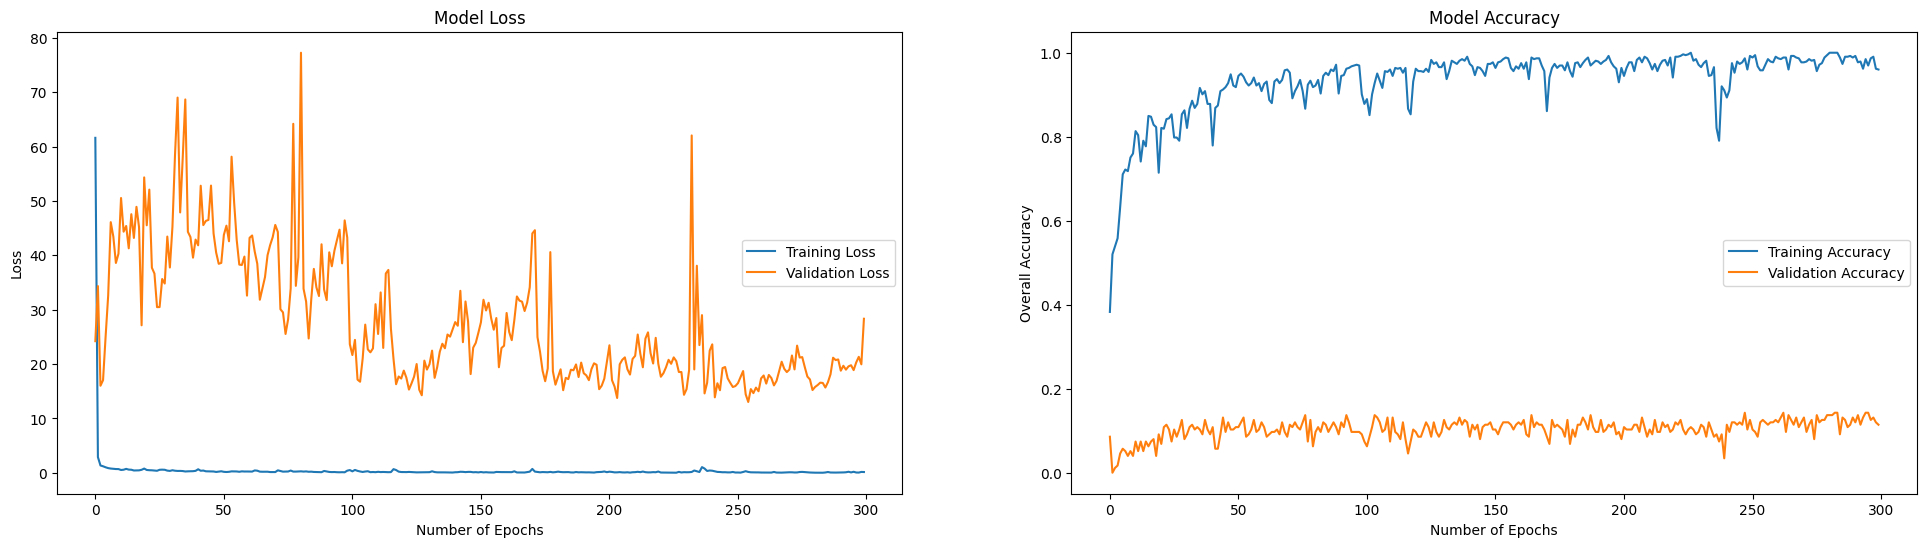

In [7]:
# Visualize the training loss across different epochs
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(24,6))
# List all data in history
print(history.history.keys())

# Visualize the training Loss across different epochs
ax1.plot(history.history['loss'])
ax1.plot(history.history['val_loss'])
ax1.title.set_text('Model Loss') # .title.set_text('First Plot')
ax1.set_ylabel('Loss')
ax1.set_xlabel('Number of Epochs')
ax1.legend(['Training Loss', 'Validation Loss'], loc='center right')
#plt.figure(1)

# Visualize the training Accuracy across different epochs
ax2.plot(history.history['accuracy'])
ax2.plot(history.history['val_accuracy'])
ax2.title.set_text('Model Accuracy')
ax2.set_ylabel('Overall Accuracy')
ax2.set_xlabel('Number of Epochs')
ax2.legend(['Training Accuracy', 'Validation Accuracy'], loc = 'center right')
plt.show()



#### 3.2.4 Load the best CNN model

In [8]:
#Get the model with best validation loss (the optimised Model weights)
#Load the optimal weights

model.load_weights("optimal_weights_cnn.keras")

#Compile the model (required to make predictions)

model.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
print('Created model and loaded weights from file')



Created model and loaded weights from file


#### 3.2.4 CNN model performance assessment

22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step
Model Training accuracy: 0.773
Model Training kappa: 0.716
Model Training f-score: 0.687
[[140   0   0   0   0]
 [  0 138   0   2   0]
 [  0   0 140   0   0]
 [  0   1  16 123   0]
 [ 35  41  39  25   0]]


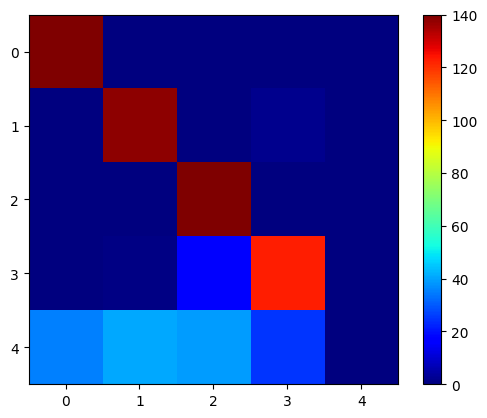

In [9]:
# Evaluate the performance of the model at the Training/calibration phase
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import f1_score

predictions = model.predict(X_train)  # vector of the probability
y_pred_train = np.argmax(predictions, axis = 1)  # we take the highest probability

print('Model Training accuracy: %.3f' % accuracy_score(y_train, y_pred_train))
print('Model Training kappa: %.3f' % cohen_kappa_score(y_train, y_pred_train))
print('Model Training f-score: %.3f' % f1_score(y_train, y_pred_train, average = 'weighted'))
cm_training = confusion_matrix(y_train, y_pred_train)
print(cm_training)
plt.imshow(cm_training, cmap = 'jet')
plt.colorbar()
plt.show()



10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step
Model Testing accuracy: 0.653
Model Testing kappa: 0.567
Model Testing f-score: 0.581
[[59  0  0  1  0]
 [ 0 58  0  2  0]
 [ 0  0 50 10  0]
 [ 0  5 26 29  0]
 [10 10 20 20  0]]


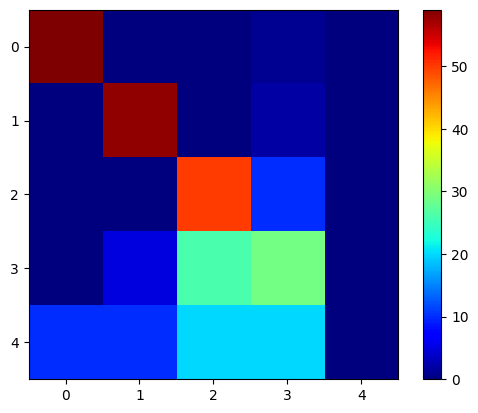

In [10]:
# Evaluate the performance of the model at the Testing phase

y_pred_ts = model.predict(X_test)  
y_pred_test = np.argmax(y_pred_ts, axis = 1)  # we take the highest probability

print('Model Testing accuracy: %.3f' % accuracy_score(y_test, y_pred_test))
print('Model Testing kappa: %.3f' % cohen_kappa_score(y_test, y_pred_test))
print('Model Testing f-score: %.3f' % f1_score(y_test, y_pred_test, average = 'weighted'))
cm_testing = confusion_matrix(y_test, y_pred_test)
print(cm_testing)
plt.imshow(cm_testing, cmap = 'jet')
plt.colorbar()
plt.show()


## 4. Applying popular CNN architectures for image classification tasks

### 4.1 Applying the popular VGG16 CNN architecture

#### 4.1.1 Import the VGG16 CNN architecture from Keras Library

In [11]:
input_shape = X_train[0].shape
classes = 5

#Import VGG16 architecture from Keras Lib
from tensorflow.keras.applications import VGG16

# Model building

model = VGG16(include_top = True, weights = None, input_shape = input_shape, classes = classes, classifier_activation="softmax")

model.summary()



C:\Users\santa\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\applications\vgg16.py:110: UserWarning: This model usually expects 1 or 3 input channels. However, it was passed an input_shape with 13 input channels.
  input_shape = imagenet_utils.obtain_input_shape(


Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 64, 64, 13)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 64, 64, 64)          │           7,552 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 64, 64, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 32, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 32, 32, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 32, 32, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 16, 16, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 16, 16, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 16, 16, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 16, 16, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 8, 8, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 8, 8, 512)           │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 8, 8, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 8, 8, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 4, 4, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ fc1 (Dense)                          │ (None, 4096)                │       8,392,704 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 39,914,949 (152.26 MB)

 Trainable params: 39,914,949 (152.26 MB)

 Non-trainable params: 0 (0.00 B)

#### 4.1.2 VGG16 Model compiling and training

In [12]:
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import Adam
#Model parameter pre-define

batch_size = 24
learn_rate = 0.001
opt = Adam(learning_rate = learn_rate)
epochs = 50

# Checkpoint Strategy
filepath = "optimal_weights_vgg16.keras"

checkpoint = ModelCheckpoint(filepath, monitor = 'val_loss', verbose = 1, save_best_only = True, mode = 'auto')
callbacks_list = [checkpoint]

# Model Compile
model.compile(optimizer = opt, loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs = epochs, batch_size = batch_size, validation_split = 0.25, callbacks = callbacks_list, verbose = 1)


Epoch 1/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.2418 - loss: 552.6516
Epoch 1: val_loss improved from inf to 3.99590, saving model to optimal_weights_vgg16.keras
22/22 ━━━━━━━━━━━━━━━━━━━━ 44s 2s/step - accuracy: 0.2417 - loss: 537.5964 - val_accuracy: 0.0000e+00 - val_loss: 3.9959
Epoch 2/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.2636 - loss: 1.4178
Epoch 2: val_loss improved from 3.99590 to 3.45277, saving model to optimal_weights_vgg16.keras
22/22 ━━━━━━━━━━━━━━━━━━━━ 37s 2s/step - accuracy: 0.2647 - loss: 1.4174 - val_accuracy: 0.0000e+00 - val_loss: 3.4528
Epoch 3/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.2838 - loss: 1.4145
Epoch 3: val_loss improved from 3.45277 to 3.42100, saving model to optimal_weights_vgg16.keras
22/22 ━━━━━━━━━━━━━━━━━━━━ 44s 2s/step - accuracy: 0.2826 - loss: 1.4156 - val_accuracy: 0.0000e+00 - val_loss: 3.4210
Epoch 4/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.2924 - loss: 1.3938
Epoch 4: val_loss did n

Epoch 52/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.8296 - loss: 0.4215
Epoch 52: val_loss did not improve from 2.95854
22/22 ━━━━━━━━━━━━━━━━━━━━ 42s 2s/step - accuracy: 0.8289 - loss: 0.4214 - val_accuracy: 0.0800 - val_loss: 22.8738
Epoch 53/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.8227 - loss: 0.4120
Epoch 53: val_loss did not improve from 2.95854
22/22 ━━━━━━━━━━━━━━━━━━━━ 35s 2s/step - accuracy: 0.8235 - loss: 0.4112 - val_accuracy: 0.0800 - val_loss: 33.7000
Epoch 54/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.8474 - loss: 0.3569
Epoch 54: val_loss did not improve from 2.95854
22/22 ━━━━━━━━━━━━━━━━━━━━ 41s 2s/step - accuracy: 0.8468 - loss: 0.3576 - val_accuracy: 0.1200 - val_loss: 16.7825
Epoch 55/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.8615 - loss: 0.3790
Epoch 55: val_loss did not improve from 2.95854
22/22 ━━━━━━━━━━━━━━━━━━━━ 35s 2s/step - accuracy: 0.8616 - loss: 0.3782 - val_accuracy: 0.0514 - val_loss: 37.9212
Epoc

Epoch 78/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9121 - loss: 0.2206
Epoch 78: val_loss did not improve from 2.95854
22/22 ━━━━━━━━━━━━━━━━━━━━ 35s 2s/step - accuracy: 0.9120 - loss: 0.2219 - val_accuracy: 0.1657 - val_loss: 133.8044
Epoch 79/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9046 - loss: 0.2398
Epoch 79: val_loss did not improve from 2.95854
22/22 ━━━━━━━━━━━━━━━━━━━━ 35s 2s/step - accuracy: 0.9036 - loss: 0.2416 - val_accuracy: 0.1771 - val_loss: 110.7289
Epoch 80/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.8904 - loss: 0.2635
Epoch 80: val_loss did not improve from 2.95854
22/22 ━━━━━━━━━━━━━━━━━━━━ 35s 2s/step - accuracy: 0.8909 - loss: 0.2624 - val_accuracy: 0.1486 - val_loss: 62.9863
Epoch 81/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.8931 - loss: 0.2312
Epoch 81: val_loss did not improve from 2.95854
22/22 ━━━━━━━━━━━━━━━━━━━━ 41s 2s/step - accuracy: 0.8941 - loss: 0.2300 - val_accuracy: 0.1657 - val_loss: 121.5935
E

#### 4.1.3 VGG16 model training history visualization

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


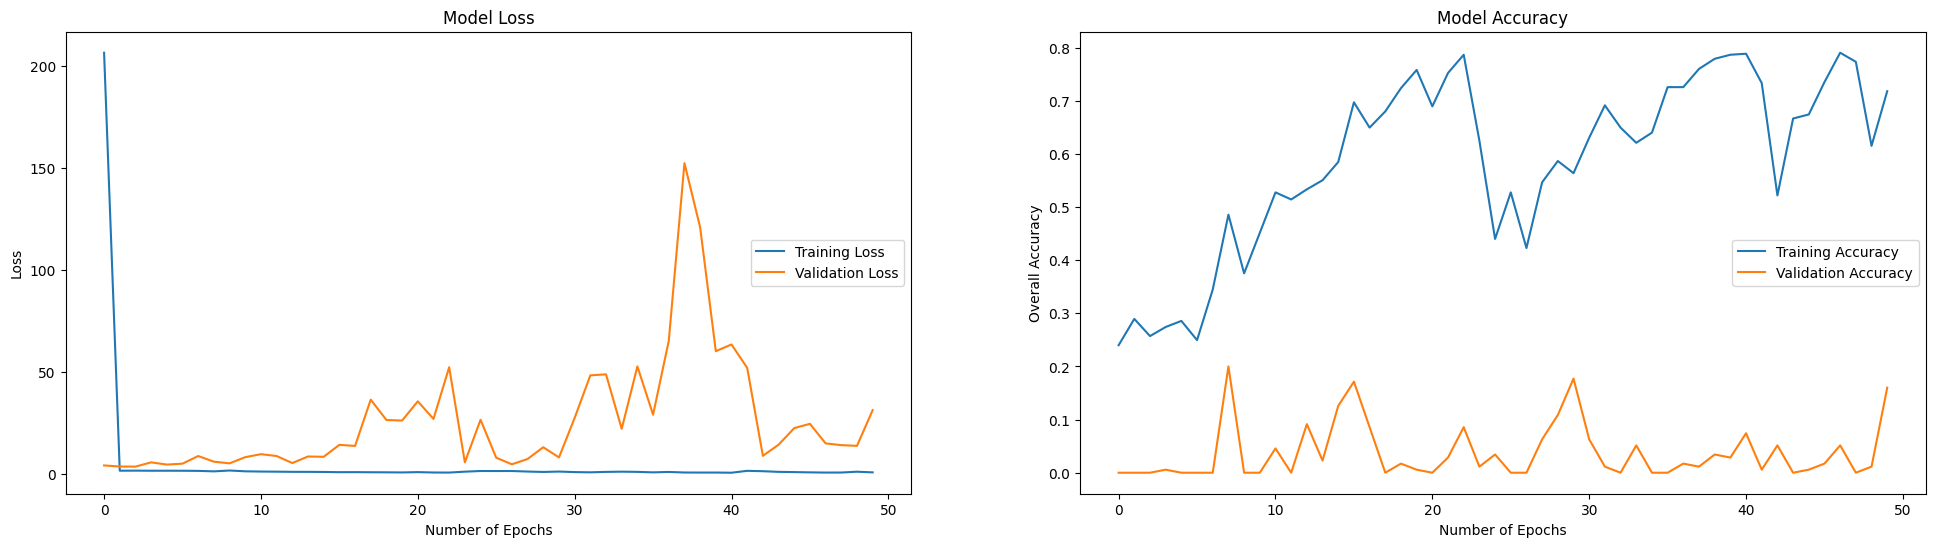

In [13]:
# Visualize the training loss across different epochs
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(24,6))
# List all data in history
print(history.history.keys())

# Visualize the training Loss across different epochs
ax1.plot(history.history['loss'])
ax1.plot(history.history['val_loss'])
ax1.title.set_text('Model Loss') # .title.set_text('First Plot')
ax1.set_ylabel('Loss')
ax1.set_xlabel('Number of Epochs')
ax1.legend(['Training Loss', 'Validation Loss'], loc='center right')
#plt.figure(1)

# Visualize the training Accuracy across different epochs
ax2.plot(history.history['accuracy'])
ax2.plot(history.history['val_accuracy'])
ax2.title.set_text('Model Accuracy')
ax2.set_ylabel('Overall Accuracy')
ax2.set_xlabel('Number of Epochs')
ax2.legend(['Training Accuracy', 'Validation Accuracy'], loc = 'center right')
plt.show()


#### 4.1.4 Load the best VGG16 model

In [14]:

#Get the model with best validation loss (the optimised Model weights)
#Load the optimal weights

model.load_weights("optimal_weights_vgg16.keras")

#Compile the model (required to make predictions)

model.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
print('Created model and loaded weights from file')



Created model and loaded weights from file


#### 4.1.5 VGG16 model performance assessment

22/22 ━━━━━━━━━━━━━━━━━━━━ 13s 554ms/step
Model Training accuracy: 0.200
Model Training kappa: 0.000
Model Training f-score: 0.067
[[140   0   0   0   0]
 [140   0   0   0   0]
 [140   0   0   0   0]
 [140   0   0   0   0]
 [140   0   0   0   0]]


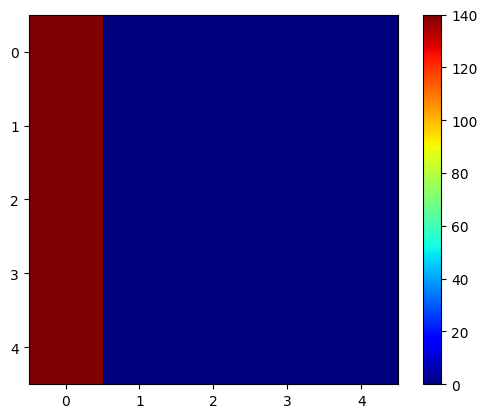

In [15]:
# Evaluate the performance of the model at the Training/calibration phase
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import f1_score#

# Evaluate the performance of the model at the Training phase

predictions = model.predict(X_train)  # vector of the probability
y_pred_train = np.argmax(predictions, axis = 1)  # we take the highest probability

print('Model Training accuracy: %.3f' % accuracy_score(y_train, y_pred_train))
print('Model Training kappa: %.3f' % cohen_kappa_score(y_train, y_pred_train))
print('Model Training f-score: %.3f' % f1_score(y_train, y_pred_train, average = 'weighted'))
cm_training = confusion_matrix(y_train, y_pred_train)
print(cm_training)
plt.imshow(cm_training, cmap = 'jet')
plt.colorbar()
plt.show()


10/10 ━━━━━━━━━━━━━━━━━━━━ 5s 519ms/step
Model Testing accuracy: 0.200
Model Testing kappa: 0.000
Model Testing f-score: 0.067
[[60  0  0  0  0]
 [60  0  0  0  0]
 [60  0  0  0  0]
 [60  0  0  0  0]
 [60  0  0  0  0]]


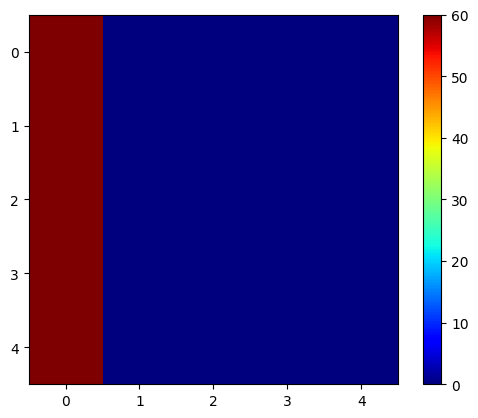

In [16]:
# Evaluate the performance of the model at the Testing phase

y_pred_ts = model.predict(X_test)  
y_pred_test = np.argmax(y_pred_ts, axis = 1)  # we take the highest probability

print('Model Testing accuracy: %.3f' % accuracy_score(y_test, y_pred_test))
print('Model Testing kappa: %.3f' % cohen_kappa_score(y_test, y_pred_test))
print('Model Testing f-score: %.3f' % f1_score(y_test, y_pred_test, average = 'weighted'))
cm_testing = confusion_matrix(y_test, y_pred_test)
print(cm_testing)
plt.imshow(cm_testing, cmap = 'jet')
plt.colorbar()
plt.show()

### 4.2 Applying ResNet50 to this classification task 

#### 4.2.1 Import the ResNet CNN architecture from Keras Library

In [17]:
input_shape = X_train[0].shape
classes = 5

#Import ResNet50 architecture from Keras Lib
from tensorflow.keras.applications import ResNet50

# Model building

model = ResNet50(include_top = True, weights = None, input_shape = input_shape, classes = classes, classifier_activation="softmax")

model.summary()



C:\Users\santa\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\applications\resnet.py:125: UserWarning: This model usually expects 1 or 3 input channels. However, it was passed an input_shape with 13 input channels.
  input_shape = imagenet_utils.obtain_input_shape(


Model: "resnet50"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)    │ (None, 64, 64, 13)        │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_pad (ZeroPadding2D)     │ (None, 70, 70, 13)        │               0 │ input_layer_2[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_conv (Conv2D)           │ (None, 32, 32, 64)        │          40,832 │ conv1_pad[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_bn (BatchNormalization) │ (None, 32, 32, 64)        │             256 │ conv1_conv[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_relu (Activation)       │ (None, 32, 32, 64)        │               0 │ conv1_bn[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ pool1_pad (ZeroPadding2D)     │ (None, 34, 34, 64)        │               0 │ conv1_relu[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ pool1_pool (MaxPooling2D)     │ (None, 16, 16, 64)        │               0 │ pool1_pad[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_1_conv (Conv2D)  │ (None, 16, 16, 64)        │           4,160 │ pool1_pool[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_1_bn             │ (None, 16, 16, 64)        │             256 │ conv2_block1_1_conv[0][0]  │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_1_relu           │ (None, 16, 16, 64)        │               0 │ conv2_block1_1_bn[0][0]    │
│ (Activation)                  │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_2_conv (Conv2D)  │ (None, 16, 16, 64)        │          36,928 │ conv2_block1_1_relu[0][0]  │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_2_bn             │ (None, 16, 16, 64)        │             256 │ conv2_block1_2_conv[0][0]  │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_2_relu           │ (None, 16, 16, 64)        │               0 │ conv2_block1_2_bn[0][0]    │
│ (Activation)                  │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_0_conv (Conv2D)  │ (None, 16, 16, 256)       │          16,640 │ pool1_pool[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_3_conv (Conv2D)  │ (None, 16, 16, 256)       │          16,640 │ conv2_block1_2_relu[0][0]  │
├───────────────────────────────┼───────────────────────────┼───────────────

 Total params: 23,629,317 (90.14 MB)

 Trainable params: 23,576,197 (89.94 MB)

 Non-trainable params: 53,120 (207.50 KB)

#### 4.2.2 ResNet50 Model compiling and training

In [18]:
#Model parameter pre-define

batch_size = 24
learn_rate = 0.001
opt = Adam(learning_rate = learn_rate)
epochs = 50

# Checkpoint Strategy
filepath = "optimal_weights_ResNet50.keras"

checkpoint = ModelCheckpoint(filepath, monitor = 'val_loss', verbose = 1, save_best_only = True, mode = 'auto')
callbacks_list = [checkpoint]

# Model Compile
model.compile(optimizer = opt, loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs = epochs, batch_size = batch_size, validation_split = 0.25, callbacks = callbacks_list, verbose = 1)


Epoch 1/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.4244 - loss: 3.0382
Epoch 1: val_loss improved from inf to 7477.50391, saving model to optimal_weights_ResNet50.keras
22/22 ━━━━━━━━━━━━━━━━━━━━ 109s 2s/step - accuracy: 0.4313 - loss: 2.9905 - val_accuracy: 0.0000e+00 - val_loss: 7477.5039
Epoch 2/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.8221 - loss: 0.5183
Epoch 2: val_loss improved from 7477.50391 to 1034.91125, saving model to optimal_weights_ResNet50.keras
22/22 ━━━━━━━━━━━━━━━━━━━━ 37s 1s/step - accuracy: 0.8208 - loss: 0.5196 - val_accuracy: 0.0000e+00 - val_loss: 1034.9113
Epoch 3/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.8576 - loss: 0.4116
Epoch 3: val_loss improved from 1034.91125 to 9.41056, saving model to optimal_weights_ResNet50.keras
22/22 ━━━━━━━━━━━━━━━━━━━━ 28s 1s/step - accuracy: 0.8572 - loss: 0.4134 - val_accuracy: 0.0000e+00 - val_loss: 9.4106
Epoch 4/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.8337 - loss: 0.4286

Epoch 52/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9646 - loss: 0.3029
Epoch 52: val_loss did not improve from 5.42219
22/22 ━━━━━━━━━━━━━━━━━━━━ 35s 2s/step - accuracy: 0.9642 - loss: 0.3008 - val_accuracy: 0.0857 - val_loss: 116.9976
Epoch 53/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 81s/step - accuracy: 0.9511 - loss: 0.4015  
Epoch 54: val_loss did not improve from 5.42219
22/22 ━━━━━━━━━━━━━━━━━━━━ 1707s 81s/step - accuracy: 0.9514 - loss: 0.4028 - val_accuracy: 0.1486 - val_loss: 884.2112
Epoch 55/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 528ms/step - accuracy: 0.9666 - loss: 0.2616
Epoch 55: val_loss did not improve from 5.42219
22/22 ━━━━━━━━━━━━━━━━━━━━ 14s 637ms/step - accuracy: 0.9668 - loss: 0.2562 - val_accuracy: 0.0343 - val_loss: 134.7114
Epoch 56/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 554ms/step - accuracy: 0.9799 - loss: 0.0723
Epoch 56: val_loss did not improve from 5.42219
22/22 ━━━━━━━━━━━━━━━━━━━━ 14s 644ms/step - accuracy: 0.9800 - loss: 0.0720 - val_accuracy: 0.1600 - v

#### 4.2.3 ResNet50 model training history visualization

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


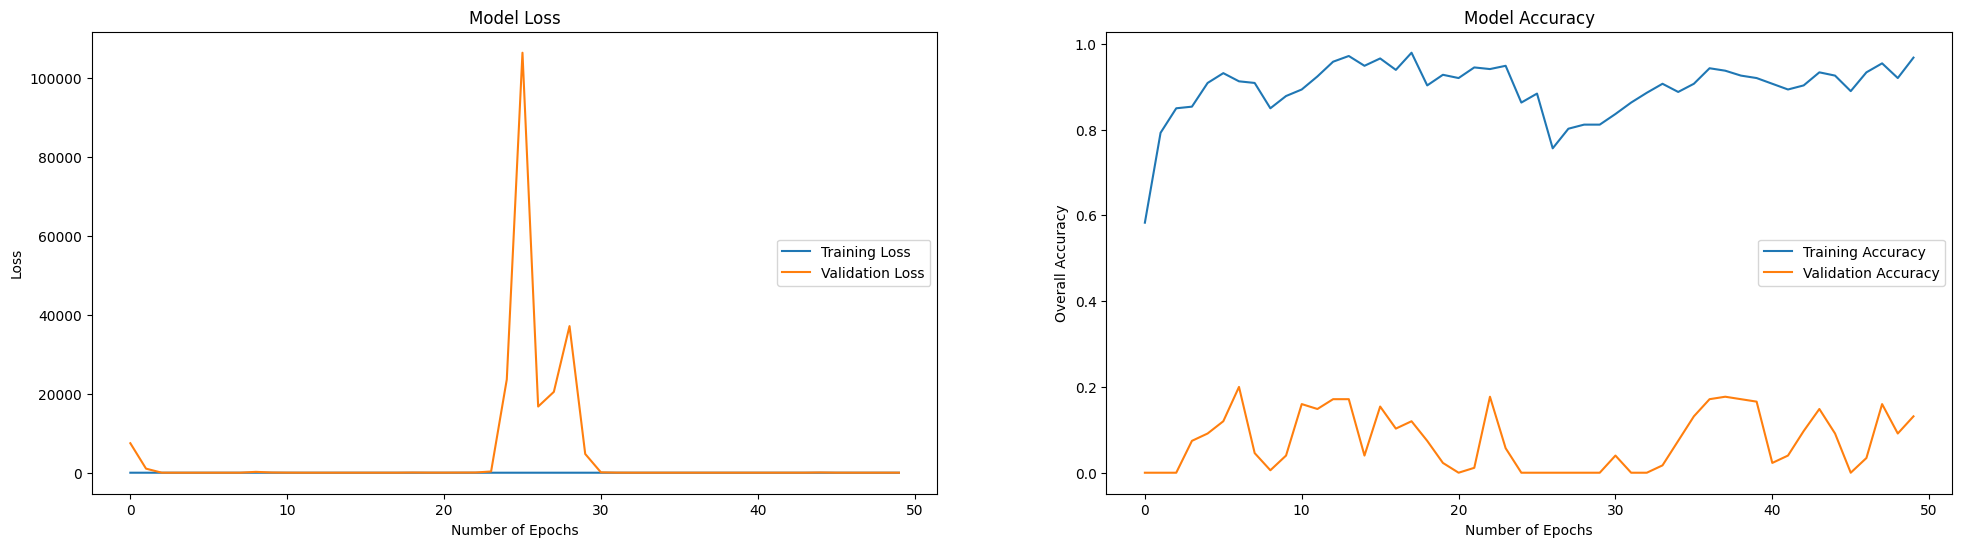

In [19]:
# Visualize the training loss across different epochs
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(24,6))
# List all data in history
print(history.history.keys())

# Visualize the training Loss across different epochs
ax1.plot(history.history['loss'])
ax1.plot(history.history['val_loss'])
ax1.title.set_text('Model Loss') # .title.set_text('First Plot')
ax1.set_ylabel('Loss')
ax1.set_xlabel('Number of Epochs')
ax1.legend(['Training Loss', 'Validation Loss'], loc='center right')
#plt.figure(1)

# Visualize the training Accuracy across different epochs
ax2.plot(history.history['accuracy'])
ax2.plot(history.history['val_accuracy'])
ax2.title.set_text('Model Accuracy')
ax2.set_ylabel('Overall Accuracy')
ax2.set_xlabel('Number of Epochs')
ax2.legend(['Training Accuracy', 'Validation Accuracy'], loc = 'center right')
plt.show()


#### 4.2.4 Load the best ResNet50 model

In [20]:

#Get the model with best validation loss (the optimised Model weights)
#Load the optimal weights

model.load_weights("optimal_weights_ResNet50.keras")

#Compile the model (required to make predictions)

model.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
print('Created model and loaded weights from file')

Created model and loaded weights from file


#### 4.2.5 ResNet50 model performance assessment

22/22 ━━━━━━━━━━━━━━━━━━━━ 8s 311ms/step
Model Training accuracy: 0.370
Model Training kappa: 0.213
Model Training f-score: 0.299
[[ 69   0  34  37   0]
 [ 22  19  57  42   0]
 [  6   3 129   2   0]
 [  0   0  98  42   0]
 [ 59   8  15  58   0]]


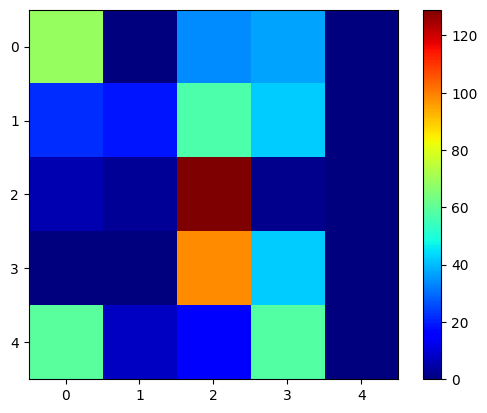

In [21]:
# Evaluate the performance of the model at the Training phase

predictions = model.predict(X_train)  # vector of the probability
y_pred_train = np.argmax(predictions, axis = 1)  # we take the highest probability

print('Model Training accuracy: %.3f' % accuracy_score(y_train, y_pred_train))
print('Model Training kappa: %.3f' % cohen_kappa_score(y_train, y_pred_train))
print('Model Training f-score: %.3f' % f1_score(y_train, y_pred_train, average = 'weighted'))
cm_training = confusion_matrix(y_train, y_pred_train)
print(cm_training)
plt.imshow(cm_training, cmap = 'jet')
plt.colorbar()
plt.show()

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 96ms/step
Model Testing accuracy: 0.353
Model Testing kappa: 0.192
Model Testing f-score: 0.296
[[26  0 11 23  0]
 [10 10 22 18  0]
 [ 6  1 50  3  0]
 [ 0  1 39 20  0]
 [21  3  7 29  0]]


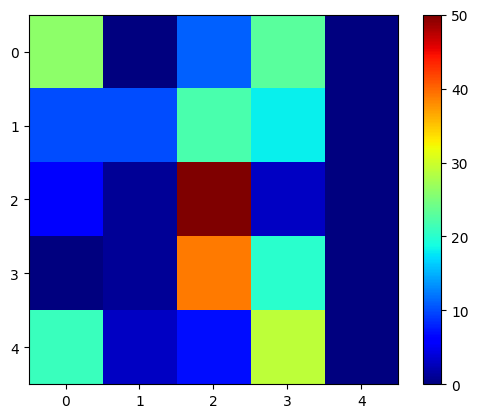

In [22]:
# Evaluate the performance of the model at the Testing phase

y_pred_ts = model.predict(X_test)  
y_pred_test = np.argmax(y_pred_ts, axis = 1)  # we take the highest probability

print('Model Testing accuracy: %.3f' % accuracy_score(y_test, y_pred_test))
print('Model Testing kappa: %.3f' % cohen_kappa_score(y_test, y_pred_test))
print('Model Testing f-score: %.3f' % f1_score(y_test, y_pred_test, average = 'weighted'))
cm_testing = confusion_matrix(y_test, y_pred_test)
print(cm_testing)
plt.imshow(cm_testing, cmap = 'jet')
plt.colorbar()
plt.show()